In [6]:
import warnings
warnings.filterwarnings(action='ignore')

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import joblib 
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# ML
import fbprophet as Prophet
from fbprophet.plot import add_changepoints_to_plot

Prophet

In [2]:
df_temp = pd.read_csv('./data/pre_data_tr.csv')
df_temp.columns=['ds','y']
df_ml = df_temp[:-30]
df_ml

,ds,y
0,2018-01-02,7166110
1,2018-01-03,7451660
2,2018-01-04,5960830
3,2018-01-05,5919560
4,2018-01-06,7249570
...,...,...
762,2020-02-25,7792890
763,2020-02-26,7243750
764,2020-02-27,6773160
765,2020-02-28,6482230


In [3]:
df_ml.sort_values(by='y', ascending=True).groupby('ds', sort=False).head(3)

,ds,y
312,2018-11-19,1588830
666,2019-11-18,1786820
129,2018-05-14,1962350
490,2019-05-20,2200380
724,2020-01-16,3832540
...,...,...
267,2018-10-04,9640690
354,2018-12-31,9681310
183,2018-07-08,9755660
387,2019-02-03,9809230


INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


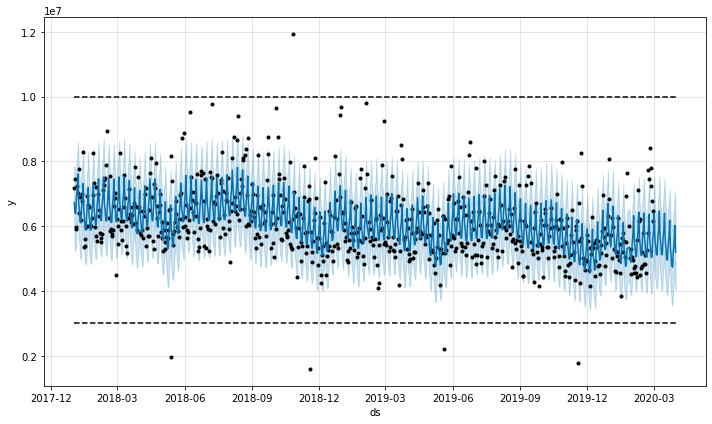

In [4]:
df_ml['cap'] = 10000000
df_ml['floor'] = 3000000
model =  Prophet.Prophet(growth='logistic') 
model.fit(df_ml);

future = model.make_future_dataframe(periods=30)
future['cap'] = 10000000
future['floor'] = 3000000
forecast = model.predict(future)
fig = model.plot(forecast)

In [7]:
y = df_temp[df_temp['ds']>'2020-02-29'].y
y_pred = forecast[forecast['ds']>'2020-02-29'].yhat
r2 = r2_score(y, y_pred)
print(r2)

0.1113419701092141


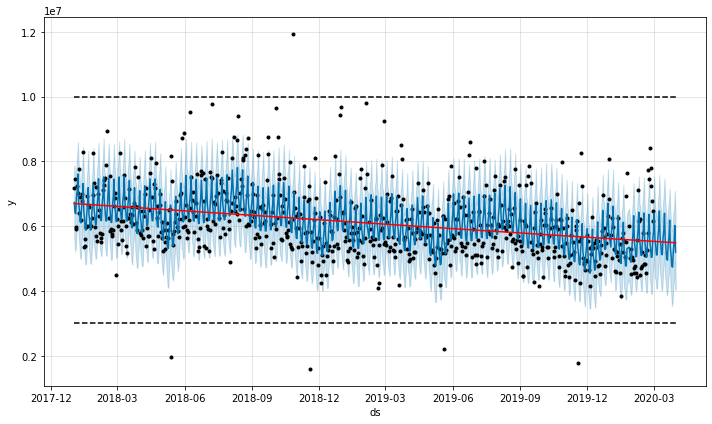

In [8]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [9]:
df_ml['cap'] = 10000000
df_ml['floor'] = 3000000
model =  Prophet.Prophet(changepoint_prior_scale=0.01) 
model.fit(df_ml);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


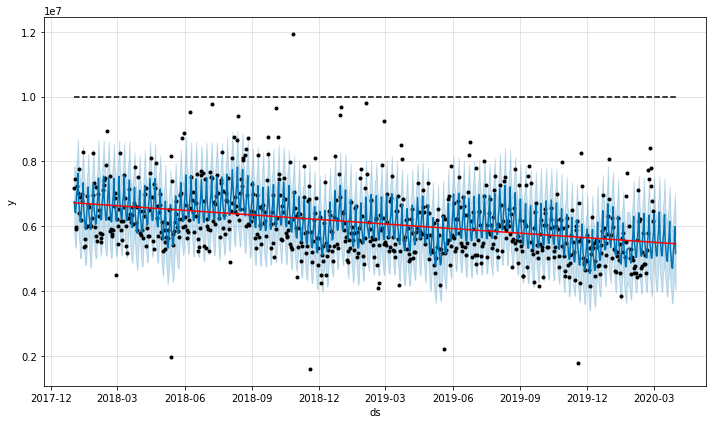

In [10]:
future = model.make_future_dataframe(periods=30)
future['cap'] = 10000000
future['floor'] = 3000000
forecast = model.predict(future)

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [11]:
y = df_temp[df_temp['ds']>'2020-02-29'].y
y_pred = round(forecast[forecast['ds']>'2020-02-29'].yhat)
r2 = r2_score(y, y_pred)
print(r2)

0.11888388902274394


In [12]:
df_hol = pd.read_csv('./data/holiday.csv')
df_hol = df_hol[df_hol['DS']>'2018-01-00']
df_hol.head()

,HOLIDAY,DS,LOWER_WINDOW,UPPER_WINDOW
827,holiday,2018-01-01,0,1
828,holiday,2018-01-06,0,1
829,holiday,2018-01-07,0,1
830,holiday,2018-01-13,0,1
831,holiday,2018-01-14,0,1


In [13]:
df_evnt = pd.read_csv('./data/evnt.txt', delimiter = '\t')
df_evnt.head()

,EVNT_START_YMD
0,2018-01-01
1,2018-01-06
2,2018-01-29
3,2018-02-01
4,2018-02-03


In [14]:
redday = pd.DataFrame({
  'holiday': 'redday',
  'ds': pd.to_datetime(df_hol['DS']),
  'lower_window': 0,
  'upper_window': 1,
})
evntday = pd.DataFrame({
  'holiday': 'evntday',
  'ds': pd.to_datetime(df_evnt['EVNT_START_YMD']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((redday, evntday))

In [15]:
df_ml['cap'] = 10000000
df_ml['floor'] = 300000
model =  Prophet.Prophet(changepoint_prior_scale=0.01, holidays=holidays, yearly_seasonality=10, weekly_seasonality=5, daily_seasonality=False) 
model.fit(df_ml);

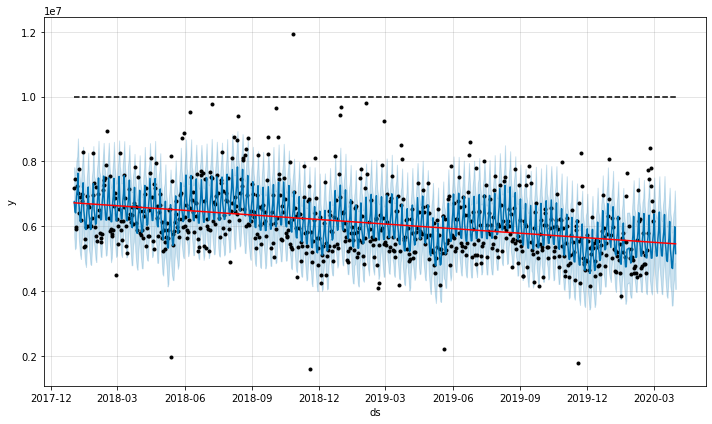

In [17]:
future = model.make_future_dataframe(periods=30)
future['cap'] = 10000000
future['floor'] = 3000000
forecast = model.predict(future)

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [18]:
y = df_temp[df_temp['ds']>'2020-02-29'].y
y_pred = round(forecast[forecast['ds']>'2020-02-29'].yhat)
r2 = r2_score(y, y_pred)
print(r2)

0.11940659620138783
